In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
M=np.load('maze.npy')
M.shape

(100, 100)

Text(0.5, 1.0, 'M')

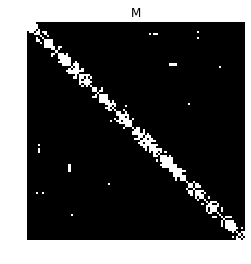

In [9]:
plt.imshow(M,cmap='gray')
plt.axis('off')
plt.title('M')

In [14]:
curr_room=0
rooms_checked=[0]
while curr_room!=99:
    #go always furthest 
    curr_room=np.argmax(M[curr_room]*np.arange(len(M)))
    if curr_room in rooms_checked:
        print('failure')
        break
    rooms_checked.append(curr_room)
    

failure


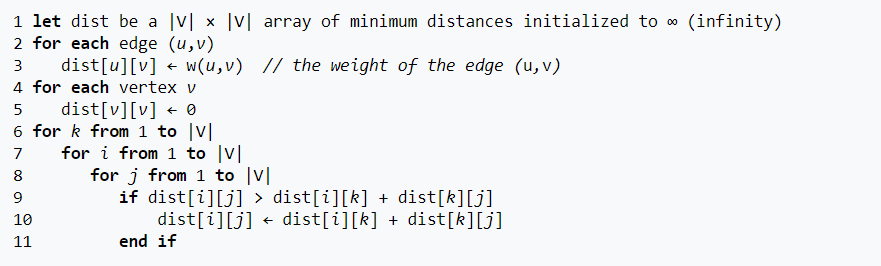
Source: https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm

In [23]:
dist = M.copy()
dist[dist==0]=np.inf
V=len(M)
dist[np.arange(V),np.arange(V)] = np.zeros(len(M))
for k in range(V):
    for i in range(V):
        for j in range(V):
            if dist[i,j]>dist[i,k]+dist[k,j]:
                dist[i,j]=dist[i,k]+dist[k,j]

(-0.5, 99.5, 99.5, -0.5)

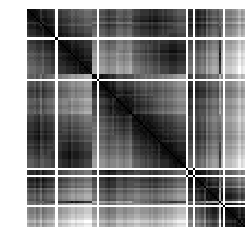

In [26]:
plt.imshow(dist,cmap='gray')
plt.axis('off')


how much does it cost from 0 to 99?

In [27]:
dist[0,99]

13.0

$\rightarrow$ 13 doors